# Resume Predictor


*   Dataset - 1 : https://www.kaggle.com/datasets/gauravduttakiit/resume-dataset
*   Dataset - 2 : https://www.kaggle.com/datasets/m296bsy1181/resume-dataset/data?select=tiny_resume_dataset_with_stopwords.csv

# Building the Model

# **1. Importing the required libraries:**






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Loading the desired resume dataset:**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('UpdatedResumeDataSet.csv')

In [ ]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
2899,web designing,education details january 2016 b sc informatio...
2900,web designing,technical skills web technologies angular js h...
2901,web designing,education details january 2016 b sc informatio...
2902,web designing,technical skills web technologies angular js h...


# **3. Finding existing job categories:**




In [ ]:
df['Category'].value_counts()

Category
sales                        156
hr                           154
information technology       120
engineering                  118
chef                         118
accountant                   118
healthcare                   115
banking                      115
construction                 112
teacher                      102
digital media                 96
Java Developer                84
Testing                       70
testing                       70
DevOps Engineer               55
devops engineer               55
Python Developer              48
web designing                 45
Web Designing                 45
HR                            44
Hadoop                        42
hadoop                        42
mechanical engineer           40
data science                  40
etl developer                 40
operations manager            40
Data Science                  40
Operations Manager            40
Sales                         40
ETL Developer                 40
B

<Axes: xlabel='Category', ylabel='count'>

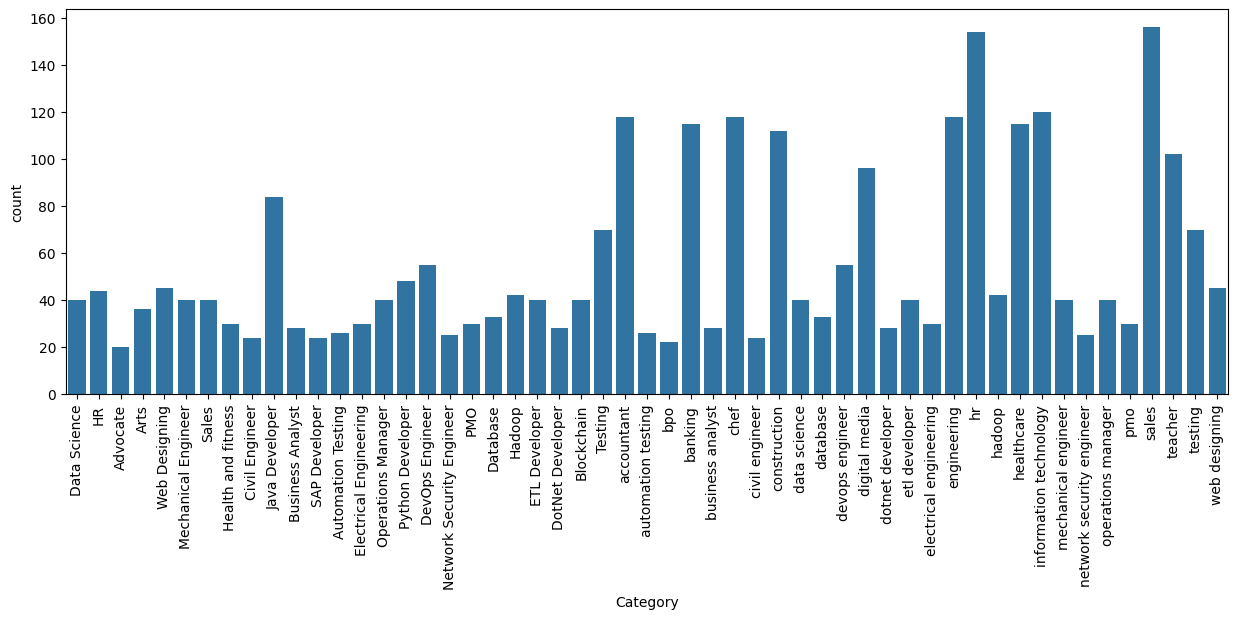

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x="Category", data=df)

# **4. Removing redundant job categories**

In [ ]:
df['Category'] = df['Category'].str.lower().str.replace('_', ' ')
df.drop_duplicates(inplace=True)
df

,Category,Resume
0,data science,Skills * Programming Languages: Python (pandas...
1,data science,Education Details \r\nMay 2013 to May 2017 B.E...
2,data science,"Areas of Interest Deep Learning, Control Syste..."
3,data science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,data science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
2804,testing,personal skills quick learner eagerness to lea...
2859,web designing,technical skills web technologies angular js h...
2860,web designing,education details january 2016 b sc informatio...
2863,web designing,education details b c a bachelor computer appl...


<Axes: xlabel='Category', ylabel='count'>

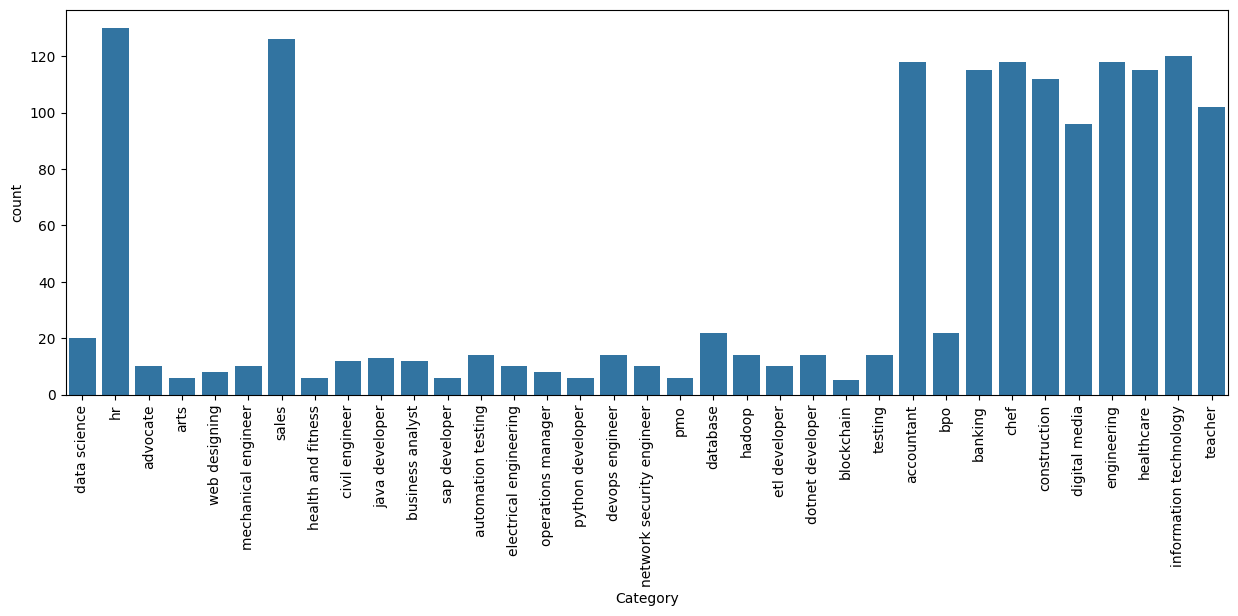

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x="Category", data=df)

In [ ]:
df['Category'] = df['Category'].replace({'automation testing': 'testing'})
df['Category'] = df['Category'].replace({'database': 'database administrator'})
df['Category'] = df['Category'].replace({'construction': 'civil engineer'})
df['Category'] = df['Category'].replace({'bpo': 'business analyst'})
df['Category'] = df['Category'].replace({'data science': 'python developer'})
df['Category'] = df['Category'].replace({'operations manager': 'devops engineer'})
df['Category'] = df['Category'].replace({'devops engineer' : 'systems administrator'})
df['Category'] = df['Category'].replace({'accountant': 'banking'})
df['Category'] = df['Category'].replace({'dotnet developer': 'web developer'})
df['Category'] = df['Category'].replace({'web designing': 'web developer'})
df['Category'] = df['Category'].replace({'electrical engineering': 'engineer'})
df['Category'] = df['Category'].replace({'mechanical engineer': 'engineer'})
df['Category'] = df['Category'].replace({'civil engineer': 'engineer'})
df['Category'] = df['Category'].replace({'engineering': 'engineer'})
df['Category'] = df['Category'].replace({'etl developer': 'java developer'})
df['Category'] = df['Category'].replace({'hadoop': 'java developer'})
df['Category'] = df['Category'].replace({'health and fitness': 'healthcare'})
df['Category'] = df['Category'].replace({'network security engineer': 'security analyst'})
df['Category'] = df['Category'].replace({'information technology': 'software developer'})
df['Category'] = df['Category'].replace({'sap developer': 'software developer'})
df['Category'] = df['Category'].replace({'blockchain': 'software developer'})
df['Category'] = df['Category'].replace({'pmo': 'project manager'})
df['Category'] = df['Category'].replace({'business analyst': 'project manager'})
df['Category'] = df['Category'].replace({'digital media': 'arts'})
df['Category'] = df['Category'].replace({'chef': 'arts'})
df['Category'] = df['Category'].replace({'advocate': 'arts'})
df['Category'] = df['Category'].replace({'teacher': 'arts'})
df['Category'] = df['Category'].replace({'healthcare': 'arts'})
df['Category'] = df['Category'].replace({'hr': 'hr and sales'})
df['Category'] = df['Category'].replace({'sales': 'hr and sales'})
df['Category'] = df['Category'].replace({'testing': 'software developer'})
df['Category'].value_counts()

Category
arts                      453
engineer                  262
hr and sales              256
banking                   233
software developer        159
project manager            40
java developer             37
python developer           26
web developer              22
systems administrator      22
database administrator     22
security analyst           10
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

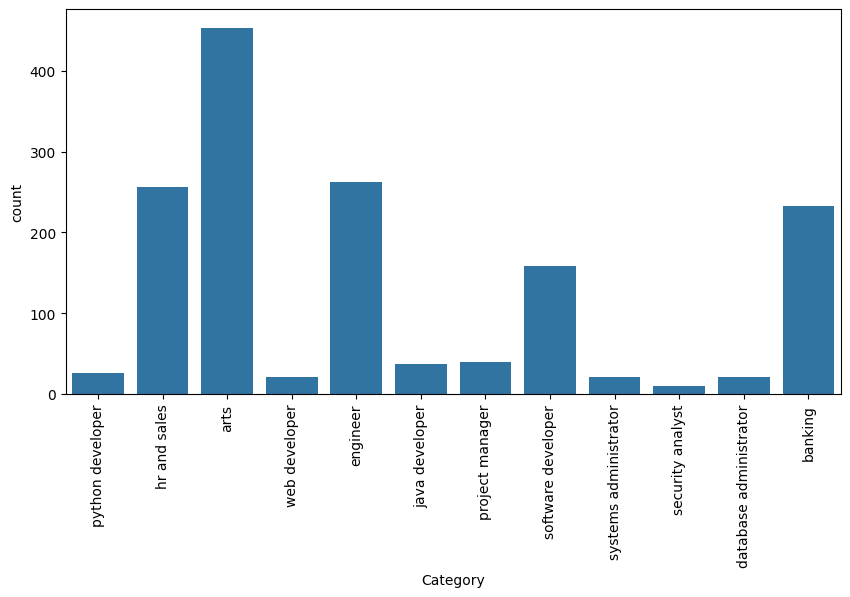

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x="Category", data=df)

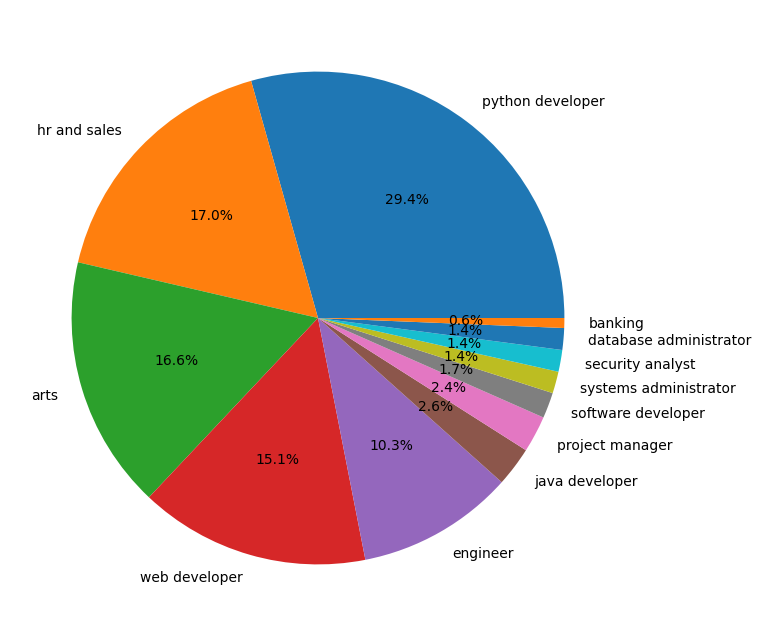

In [ ]:
counts = df['Category'].value_counts()
labels = df['Category'].unique()
plt.figure(figsize=(8,8))
plt.pie(counts,labels=labels,autopct='%1.1f%%')
plt.show()

# **5. Cleaning resume data**

In [ ]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt) #links
    cleanText = re.sub('#\S+\s', ' ', cleanText) #Hashtags
    cleanText = re.sub('@\S+', '  ', cleanText) #Handles
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText) #Punctuations
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)  #Special Characters
    cleanText = re.sub('\s+', ' ', cleanText) #Extra Whitespaces
    return cleanText

In [ ]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))
df['Resume'][0]

'Skills Programming Languages Python pandas numpy scipy scikit learn matplotlib Sql Java JavaScript JQuery Machine learning Regression SVM Na ve Bayes KNN Random Forest Decision Trees Boosting techniques Cluster Analysis Word Embedding Sentiment Analysis Natural Language processing Dimensionality reduction Topic Modelling LDA NMF PCA Neural Nets Database Visualizations Mysql SqlServer Cassandra Hbase ElasticSearch D3 js DC js Plotly kibana matplotlib ggplot Tableau Others Regular Expression HTML CSS Angular 6 Logstash Kafka Python Flask Git Docker computer vision Open CV and understanding of Deep learning Education Details Data Science Assurance Associate Data Science Assurance Associate Ernst Young LLP Skill Details JAVASCRIPT Exprience 24 months jQuery Exprience 24 months Python Exprience 24 monthsCompany Details company Ernst Young LLP description Fraud Investigations and Dispute Services Assurance TECHNOLOGY ASSISTED REVIEW TAR Technology Assisted Review assists in accelerating the

# **6. Label Encoding and Tf-Idf Vectorization**

In [ ]:
df['Category'].unique()

array(['banking', 'java developer', 'engineer', 'arts', 'hr and sales',
       'software developer', 'web developer', 'python developer',
       'project manager', 'security analyst', 'systems administrator',
       'database administrator'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

In [ ]:
df['Category'].unique()

array([ 1,  5,  3,  0,  4,  9, 11,  7,  6,  8, 10,  2])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText  = tfidf.transform(df['Resume'])

# **7. Training the model**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2)

In [ ]:
X_train.shape

(246, 13407)

In [ ]:
X_test.shape

(62, 13407)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier #KNN Classifier
from sklearn.multiclass import OneVsRestClassifier #Multi-Category Classifier
from sklearn.metrics import accuracy_score #Prediction Score
from sklearn.metrics import classification_report #Prediction Score


clf = OneVsRestClassifier(KNeighborsClassifier())
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.6774193548387096
              precision    recall  f1-score   support

           0       0.70      0.93      0.80        15
           1       0.83      0.62      0.71         8
           2       1.00      1.00      1.00         2
           3       1.00      0.77      0.87        13
           4       0.62      0.56      0.59         9
           5       0.20      0.50      0.29         2
           6       0.00      0.00      0.00         2
           7       0.00      0.00      0.00         1
           9       0.45      0.71      0.56         7
          10       0.00      0.00      0.00         1
          11       0.00      0.00      0.00         2

    accuracy                           0.68        62
   macro avg       0.44      0.46      0.44        62
weighted avg       0.67      0.68      0.66        62



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


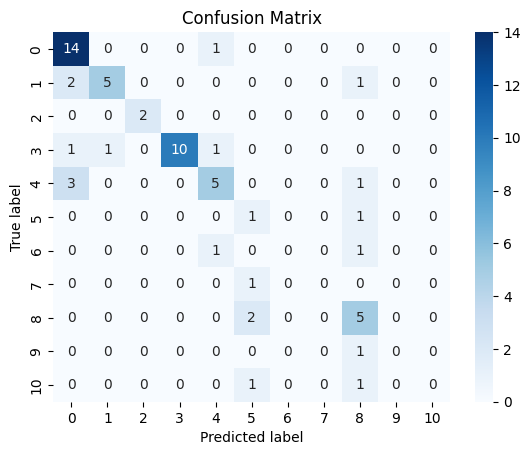

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix")
plt.show()


#**8. Resume Parser**



In [ ]:
!pip install tika

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32621 sha256=6da1684f019b996aaf56840d2119ed8073e10353aaf4b398e821ba7947d9b49e
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [ ]:
from tika import parser
from functools import reduce
import pandas as pd

In [ ]:
file = r'/content/drive/MyDrive/Colab Notebooks/ML Project UI21CS64_75/Resume_Yashraj.pdf'
file_data = parser.from_file(file)

2024-04-24 13:45:20,241 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar to /tmp/tika-server.jar.
2024-04-24 13:45:20,676 [MainThread  ] [INFO ]  Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
INFO:tika.tika:Retrieving http://search.maven.org/remotecontent?filepath=org/apache/tika/tika-server-standard/2.6.0/tika-server-standard-2.6.0.jar.md5 to /tmp/tika-server.jar.md5.
2024-04-24 13:45:21,002 [MainThread  ] [WARNI]  Failed to see startup log message; retrying...


In [ ]:
text = file_data['content']
print(text)






































Yashraj Kulshrestha
Indian Institute of Information Technology, Surat

� +91 7976174613 # yrk.yashrajkul@gmail.com ï LinkedIn § Github

Education

IIIT Surat Nov. 2021 – Present

BTech in Computer Science and Engineering CGPA: 8.96/10 (till 5th semester)

Maa Bharti Sr. Sec. School 2018 – 2020

CBSE XII Percentage: 93.4%

Experience

Technical Offerings And System Solutions Dec 2023 – Jan 2024

Backend Developer Remote
• Contributed to client-server communication and message handling ensuring a well-structured project.

• Demonstrated proficiency in networking concepts and backend principles to develop dependable software solutions.

DoT Restros May 2023 – July 2023

Website Developer Surat, Gujarat
• Contributed to DoT Restros by creating an order-taking website with an integrated admin panel.

• Designed and integrated admin panel for streamlined order management, enhancing operational control.

Projects

TerraTech | NodeJs, ExpressJs, MongoDb
• O

In [ ]:
parsed_content = {}

In [ ]:
#E-MAIL
import re
def get_email_addresses(string):
    r = re.compile(r'[\w\.-]+@[\w\.-]+')
    return r.findall(string)

email = get_email_addresses(text)
emails = reduce(lambda re, x: re+[x] if x not in re else re, email, [])
print(emails)
parsed_content['E-mail'] = email

['yrk.yashrajkul@gmail.com']


In [ ]:
#PHONE NUMBER
import re
def get_phone_numbers(string):
    r = re.compile(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})')
    phone_numbers = r.findall(string)
    return [re.sub(r'\D', '', num) for num in phone_numbers]

phone_number= get_phone_numbers(text)
print(phone_number[0])


7976174613


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

def extract_name(text):
   nlp_text = nlp(text)

   # First name and Last name are always Proper Nouns
   pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]

   matcher.add('NAME', [pattern], on_match = None)

   matches = matcher(nlp_text)

   for match_id, start, end in matches:
       span = nlp_text[start:end]
       return span.text

name = extract_name(text)
print("Name:", name)
parsed_content['Name'] =  name

Name: Yashraj Kulshrestha


In [ ]:
Keywords = ["education",
            "summary",
            "accomplishments",
            "executive profile",
            "professional profile",
            "personal profile",
            "work background",
            "academic profile",
            "other activities",
            "qualifications",
            "experience",
            "interests",
            "skills",
            "achievements",
            "publications",
            "publication",
            "certifications",
            "workshops",
            "project work",
            "internships",
            "trainings",
            "hobbies",
            "overview",
            "objective",
            "position of responsibility",
            "jobs"
           ]

In [ ]:
text = text.replace("\n"," ")
text = text.replace("[^a-zA-Z0-9]", " ");
re.sub('\W+','', text)
text = text.lower()
print(text)

                                     yashraj kulshrestha indian institute of information technology, surat  � +91 7976174613 # yrk.yashrajkul@gmail.com ï linkedin § github  education  iiit surat nov. 2021 – present  btech in computer science and engineering cgpa: 8.96/10 (till 5th semester)  maa bharti sr. sec. school 2018 – 2020  cbse xii percentage: 93.4%  experience  technical offerings and system solutions dec 2023 – jan 2024  backend developer remote • contributed to client-server communication and message handling ensuring a well-structured project.  • demonstrated proficiency in networking concepts and backend principles to develop dependable software solutions.  dot restros may 2023 – july 2023  website developer surat, gujarat • contributed to dot restros by creating an order-taking website with an integrated admin panel.  • designed and integrated admin panel for streamlined order management, enhancing operational control.  projects  terratech | nodejs, expressjs, mongodb • o

In [ ]:
content = {}
indices = []
keys = []
for key in Keywords:
    try:
        content[key] = text[text.index(key) + len(key):]
        indices.append(text.index(key))
        keys.append(key)
    except:
        pass


In [ ]:
#Sorting the indices
zipped_lists = zip(indices, keys)
sorted_pairs = sorted(zipped_lists)
sorted_pairs

tuples = zip(*sorted_pairs)
indices, keys = [ list(tuple) for tuple in  tuples]
keys

['education', 'experience', 'achievements', 'skills']

In [ ]:
#Keeping the required content and removing the redundant part
content = []
for idx in range(len(indices)):
    if idx != len(indices)-1:
        content.append(text[indices[idx]: indices[idx+1]])
    else:
        content.append(text[indices[idx]: ])

In [ ]:
for i in range(len(indices)):
    parsed_content[keys[i]] = content[i]

In [ ]:
parsed_content['ImpData'] = parsed_content['education']+parsed_content['experience']+parsed_content['skills']+parsed_content['achievements']

In [ ]:
print(parsed_content['ImpData'])

education  iiit surat nov. 2021 – present  btech in computer science and engineering cgpa: 8.96/10 (till 5th semester)  maa bharti sr. sec. school 2018 – 2020  cbse xii percentage: 93.4%  experience  technical offerings and system solutions dec 2023 – jan 2024  backend developer remote • contributed to client-server communication and message handling ensuring a well-structured project.  • demonstrated proficiency in networking concepts and backend principles to develop dependable software solutions.  dot restros may 2023 – july 2023  website developer surat, gujarat • contributed to dot restros by creating an order-taking website with an integrated admin panel.  • designed and integrated admin panel for streamlined order management, enhancing operational control.  projects  terratech | nodejs, expressjs, mongodb • orchestrated a dynamic terratech site for carbon footprint tracking, integrating real-time global weather data.  • created compelling visuals and content about global warming

# **9. Prediction System**

In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [ ]:
import re
def clean_resume(resume_text):
    clean_text = re.sub('http\S+\s*', ' ', resume_text)
    clean_text = re.sub('RT|cc', ' ', clean_text)
    clean_text = re.sub('#\S+', '', clean_text)
    clean_text = re.sub('@\S+', '  ', clean_text)
    clean_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', clean_text)
    clean_text = re.sub(r'[^\x00-\x7f]', r' ', clean_text)
    clean_text = re.sub('\s+', ' ', clean_text)
    return clean_text

In [ ]:
input_data = cleanResume(parsed_content['ImpData'])
input_features = tfidf.transform([input_data])
prediction_id = clf.predict(input_features)[0]

In [ ]:
import pickle

clf = pickle.load(open('clf.pkl', 'rb'))

cleaned_resume = cleanResume(parsed_content['ImpData'])

input_features = tfidf.transform([cleaned_resume])

prediction_id = clf.predict(input_features)[0]

category_mapping = {
     0:"arts",
     3:"engineer",
     4:"hr and sales",
     10:"systems administrator",
     1:"banking",
     2:"database administrator",
     7:"python developer",
     5:"java developer",
     9:"software developer",
     6:"project manager",
     11:"web developer",
     8:"security analyst",
}

category_name = category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", category_name)

Predicted Category: python developer
